## Machine Learning - Decision Trees & Random Forests

the data I will be using is publicly available data from LendingClub.com

will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Import Libraries

In [1]:
# starting with importing libariraies 

import numpy as np
import pandas as pd

In [2]:
# importing data visualization libraries 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


### Get the Data

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

### Exploratory Data Analysis

will use seaborn and pandas built-in plotting capabilities

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

##### N: Note that I  recommend just using pandas built in .hist()*

<Axes: >

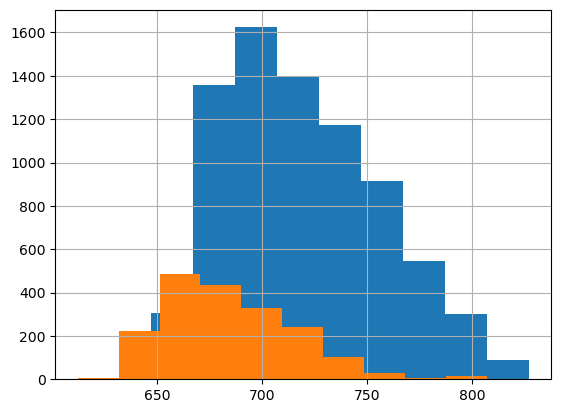

In [7]:
loans[loans['credit.policy']==1]['fico'].hist()
loans[loans['credit.policy']==0]['fico'].hist()

Text(0.5, 0, 'FICO')

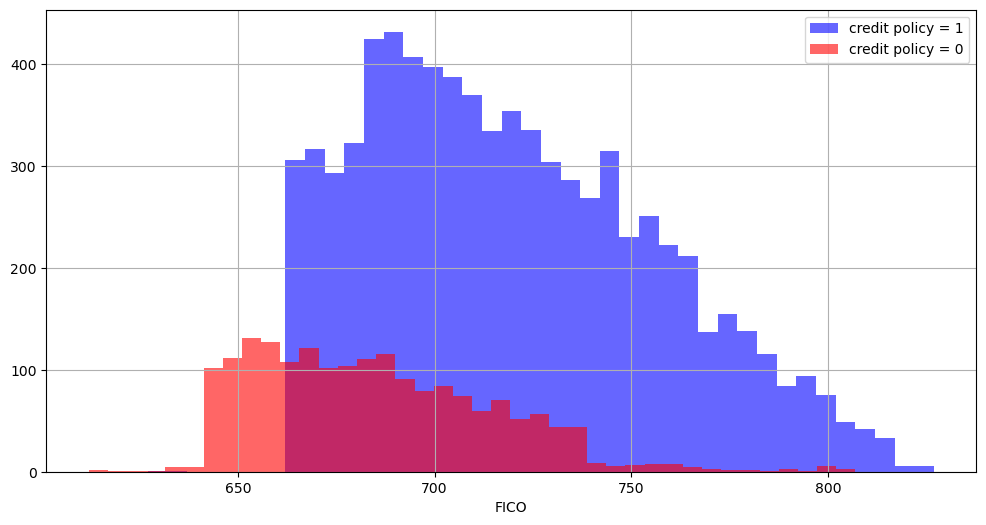

In [8]:
# let's add more adrguments to make it look better 

plt.figure(figsize=(12, 6))
loans[loans['credit.policy']==1]['fico'].hist(bins= 40, color='blue',
                                             label='credit policy = 1',
                                             alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins= 40, color='red',
                                            label='credit policy = 0',
                                             alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Create a similar figure select by the not.fully.paid column

Text(0.5, 0, 'Not Fully Paid')

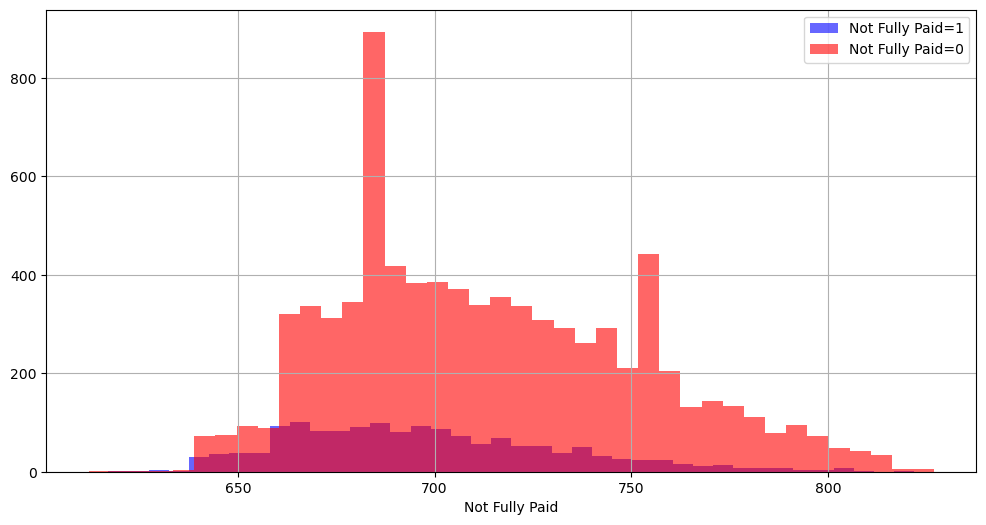

In [9]:
# let's add more adrguments to make it look better 

plt.figure(figsize=(12, 6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins= 40, color='blue',
                                             label='Not Fully Paid=1',
                                             alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins= 40, color='red',
                                            label='Not Fully Paid=0',
                                             alpha=0.6)
plt.legend()
plt.xlabel('Not Fully Paid')

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid

<Axes: xlabel='purpose', ylabel='count'>

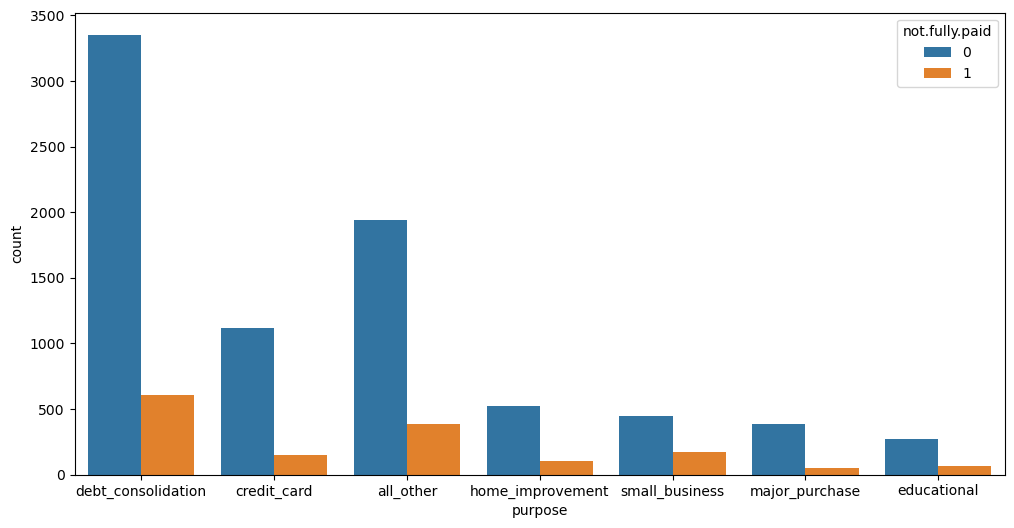

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans)

Let's see the trend between FICO score and interest rate.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(37.597222222222214, 0.5, 'Interst Rate')

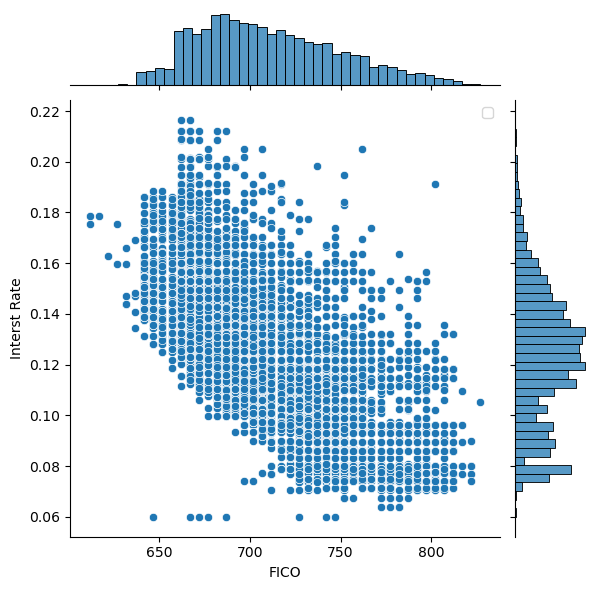

In [11]:
sns.jointplot (x='fico', y='int.rate', data=loans)
plt.legend ()
plt.xlabel ('FICO')
plt.ylabel ('Interst Rate')


Creating lmplots to see if the trend differed between 'not.fully.paid' and 'credit.policy'

documentation for lmplot() to figure out how to separate it into columns

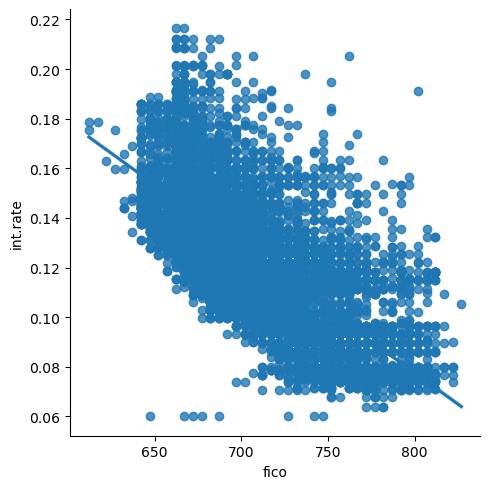

In [12]:
sns.lmplot(y='int.rate', x='fico', data=loans)

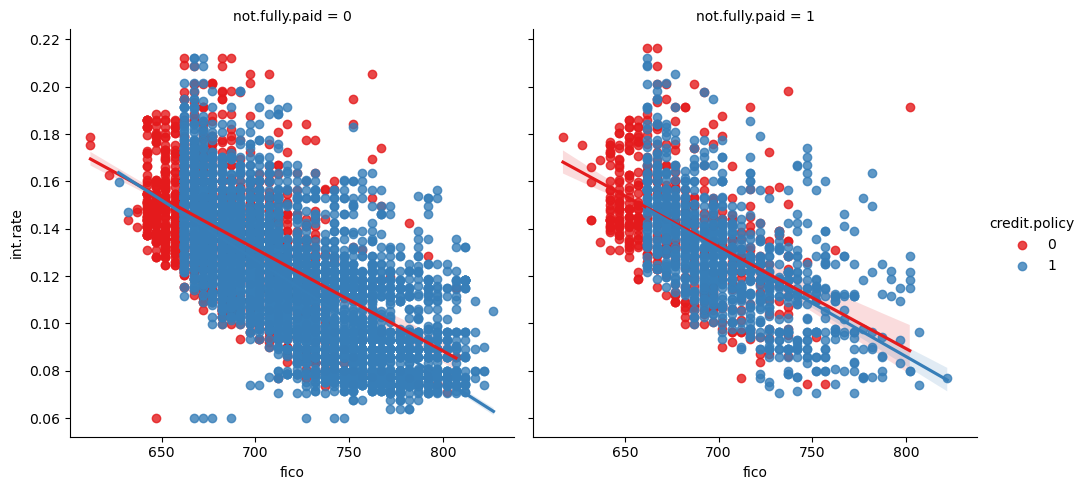

In [13]:
# add more arguments 

sns.lmplot(y='int.rate', x='fico', data=loans,
          hue='credit.policy',
          col='not.fully.paid',
          palette='Set1')

the columns representing the not fully paid value and the coloring representing the credit policy

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

note that the **purpose** column as categorical

will need to transform them using dummy variables so sklearn will be able to understand them. will do this using pd.get_dummies.

dealing with these columns that can be expanded to multiple categorical features if necessary.

**creating a list of single element containing the string 'purpose'. calling this list cat_feats.**

In [15]:
cat_feats = ['purpose']

using pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. 

and set this dataframe as final_data.

In [16]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [17]:
final_data

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  purpose_credit_card  \
0           0               0                    0   
1           0               0                    1   
2           0               0                    0   
3           0               0                    0   
4           0               0                    1   
...       ...             ...                  ...   
9573        0               1                    0   
9574        0               1                    0   
9575        0               1                    0   
9576        0               1                    0   
9577        0               1                    0   

      purpose_debt_consolidation  purpose_educational  \
0                              1                    0   
1                              0                    0   
2                              1                    0   
3                              1                    0   
4                              0                    0   
...                          ...                  ...   
9573                           0                    0   
9574                           0                    0   
9575                           1                    0   
9576                           0                    0   
9577                           1                    0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  
...                        ...                     ...                     ...  
9573                         0                       0                       0  
9574                         0                       0                       0  
9575                         0                       0                       0  
9576        

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

<Figure size 2000x800 with 0 Axes>

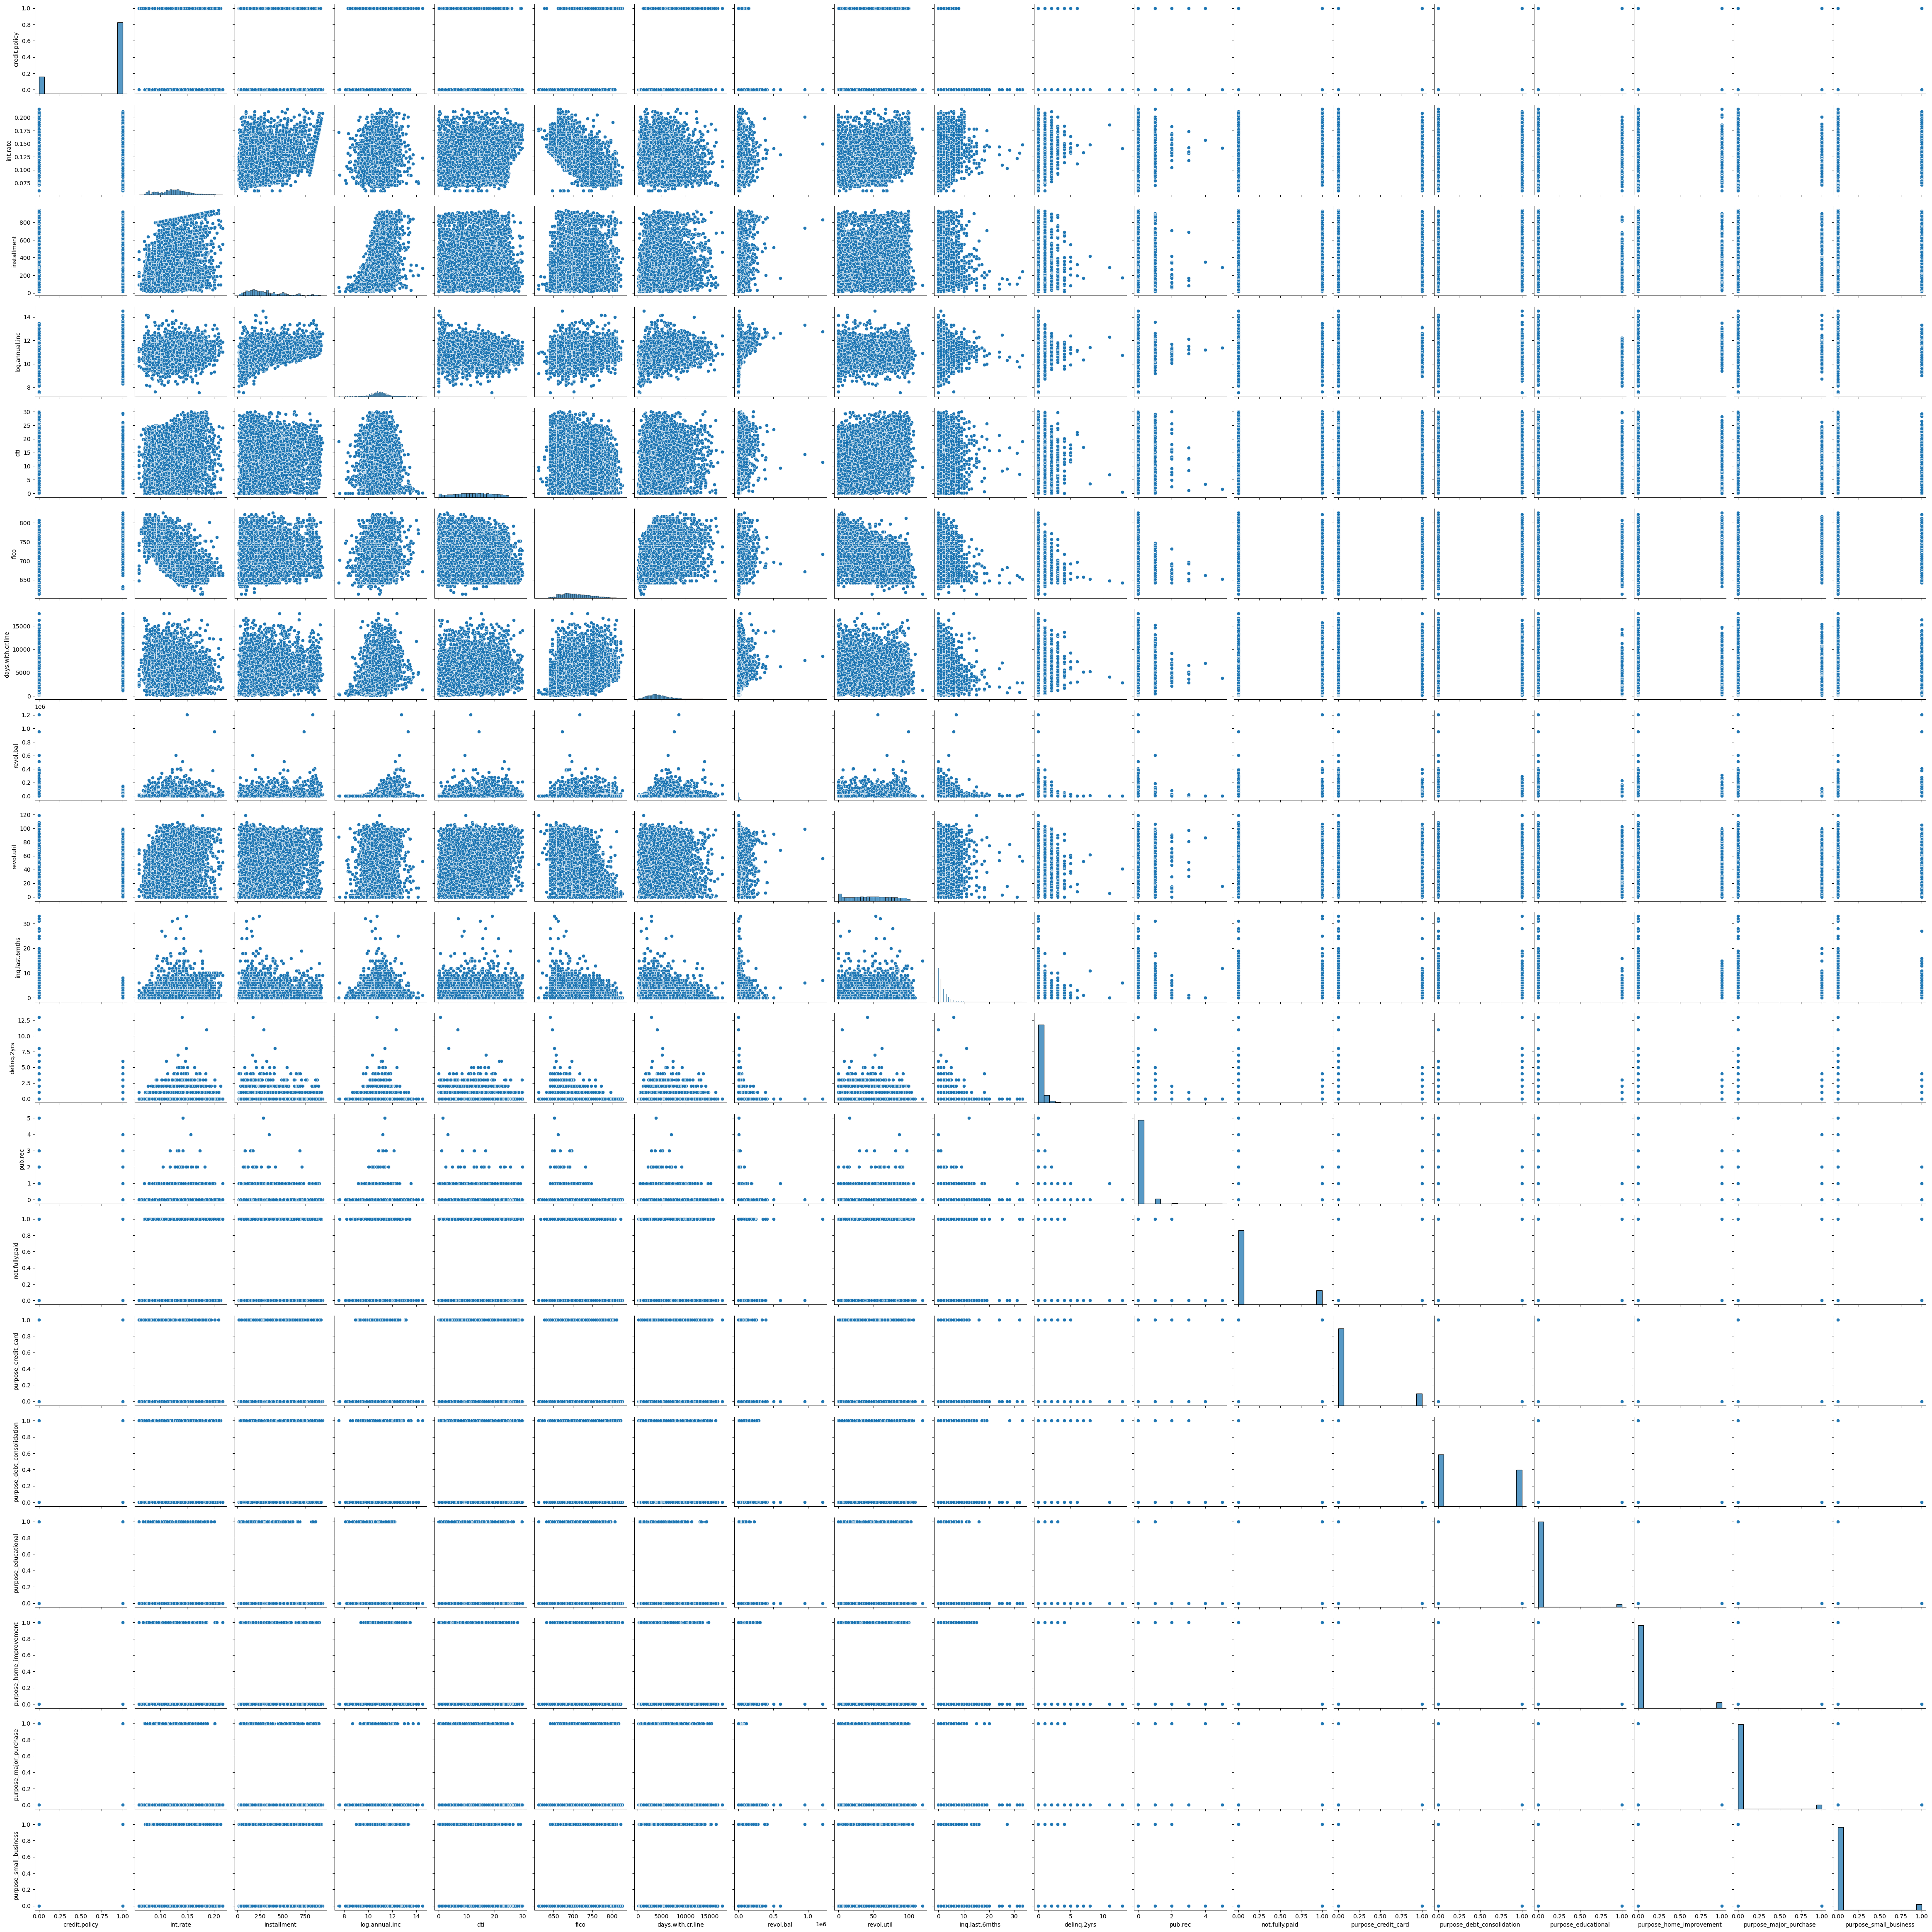

<Figure size 2000x800 with 0 Axes>

In [18]:
sns.pairplot(final_data)
plt.figure (figsize=(20,8))

### Train Test Split

now we split our data into a training set and a testing set

**Use sklearn model selection and import train, test, split.**

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training a Decision Tree Model

starting by training a single decision tree first

**Import DecisionTreeClassifier**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# create an instance of a decision tree classifier

dtree = DecisionTreeClassifier()

In [23]:
# fit it to the data

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

create predictions from the test set

**create a classification report and a confusion matrix.**

In [24]:
predictions = dtree.predict(X_test)

In [25]:
# make a confusion matrix and classification course

from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [27]:
print(confusion_matrix(y_test,predictions))

[[2010  398]
 [ 365  101]]


### Training the Random Forest model

time to train our model one more time

**create an instance of the RandomForestClassifier class and fit it to our training data**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# creating the object

rfc = RandomForestClassifier(n_estimators=300)

In [30]:
# fitting our data

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

### Predictions and Evaluation

predict off the y_test values and evaluate our model

**Predict the class of 'not.fully.paid' for the X_test data**

In [31]:
predictions = rfc.predict(X_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.44      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874



In [33]:
print(confusion_matrix(y_test,predictions))

[[2398   10]
 [ 458    8]]


**What performed better the random forest or the decision tree?**

-  Depends what metric you are trying to optimize for. 
-  Notice the recall for each class for the models.
-  Neither did very well, more feature engineering is needed.

### - - - - The end - - - -